In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print('train images     :', mnist.train.images.shape,
      'labels:           ', mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:          ', mnist.validation.labels.shape)
print('test images:      ', mnist.test.images.shape,
      'labels:           ', mnist.test.labels.shape)

train images     : (55000, 784) labels:            (55000, 10)
validation images: (5000, 784)  labels:           (5000, 10)
test images:       (10000, 784) labels:            (10000, 10)


In [4]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [57]:
x = tf.placeholder("float", [None, 784])

In [58]:
h1 = layer(output_dim=1000, input_dim=784, inputs=x, activation=tf.nn.relu)
h2 = layer(output_dim=1000, input_dim=1000, inputs = h1, activation=tf.nn.relu)

In [59]:
y_predict = layer(output_dim=10, input_dim=1000, inputs=h2, activation=None)

In [60]:
y_label = tf.placeholder("float", [None, 10])

In [61]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict, labels=y_label))

In [62]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [63]:
correct_prediction = tf.equal(tf.argmax(y_label,1), tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [64]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(len(mnist.train.images)/batchSize)
print ('totalBatchs: ', totalBatchs)
loss_list = [];epoch_list = []; accuracy_list = []
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

totalBatchs:  550


In [65]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})
    
    loss, acc = sess.run([loss_function, accuracy],
                         feed_dict={x: mnist.validation.images,
                                    y_label: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("train Epoch:", '%2d' % (epoch+1), "Loss=", "{:.9f}".format(loss), " Accuracy=", acc)
    
duration = time() - startTime
print("Train Finished takes:", duration)

train Epoch:  1 Loss= 134.639556885  Accuracy= 0.9122
train Epoch:  2 Loss= 82.632324219  Accuracy= 0.9358
train Epoch:  3 Loss= 68.580596924  Accuracy= 0.9454
train Epoch:  4 Loss= 67.565681458  Accuracy= 0.9456
train Epoch:  5 Loss= 67.797950745  Accuracy= 0.95
train Epoch:  6 Loss= 54.442737579  Accuracy= 0.9598
train Epoch:  7 Loss= 52.797206879  Accuracy= 0.9596
train Epoch:  8 Loss= 59.806705475  Accuracy= 0.9546
train Epoch:  9 Loss= 55.346145630  Accuracy= 0.962
train Epoch: 10 Loss= 52.243644714  Accuracy= 0.9646
train Epoch: 11 Loss= 49.672332764  Accuracy= 0.9642
train Epoch: 12 Loss= 60.436038971  Accuracy= 0.9592
train Epoch: 13 Loss= 53.853900909  Accuracy= 0.9636
train Epoch: 14 Loss= 49.811286926  Accuracy= 0.9662
train Epoch: 15 Loss= 51.551033020  Accuracy= 0.9648
Train Finished takes: 290.94123458862305


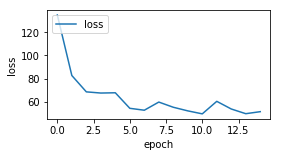

In [66]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

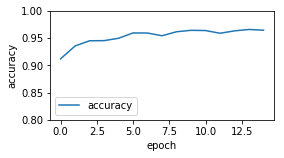

In [67]:
plt.plot(epoch_list, accuracy_list, label="accuracy")
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [68]:
print("Accuracy:", sess.run(accuracy,feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

Accuracy: 0.9657


In [36]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x:mnist.test.images})

In [37]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 1, 5, 9])

In [42]:
import numpy as np
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[i],(28,28)),cmap='binary')
        title="label="+str(np.argmax(labels[i]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[i])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
    plt.show()

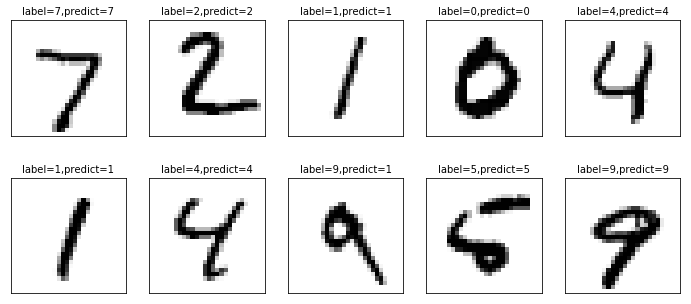

In [43]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)